In [2]:
# --------------------
# MONTAJE DE DRIVE Y DIRECTORIO DEL PROYECTO
# --------------------
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Proyecto-IA-DeteccionDeFraudeEnTransacciones

# --------------------
# IMPORTS GENERALES
# --------------------
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Añadir src al path para importar utils y visualization
sys.path.append('/content/drive/MyDrive/Proyecto-IA-DeteccionDeFraudeEnTransacciones/src')
from utils import load_data, save_model
from visualization import save_plot

# Directorios principales
data_raw = "data/"
data_processed = "data/processed"
models_dir = "models/trained_models"
os.makedirs(data_processed, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

print("Setup completo ✅")

Mounted at /content/drive
/content/drive/MyDrive/Proyecto-IA-DeteccionDeFraudeEnTransacciones
Setup completo ✅



RandomForest Metrics:
ROC-AUC: 0.9796
PR-AUC: 0.9447


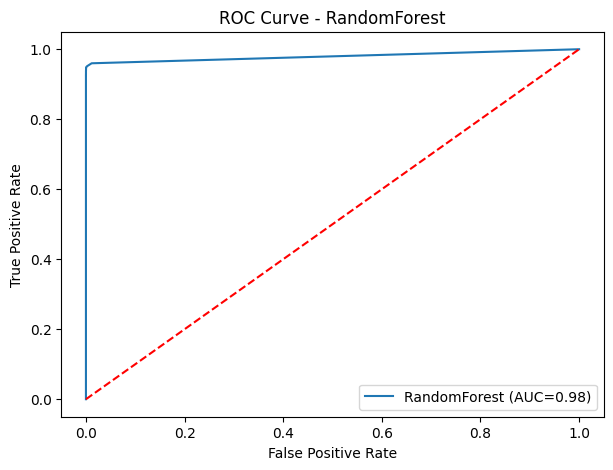

Figura guardada en src/visualization/roc_curve_RandomForest.png


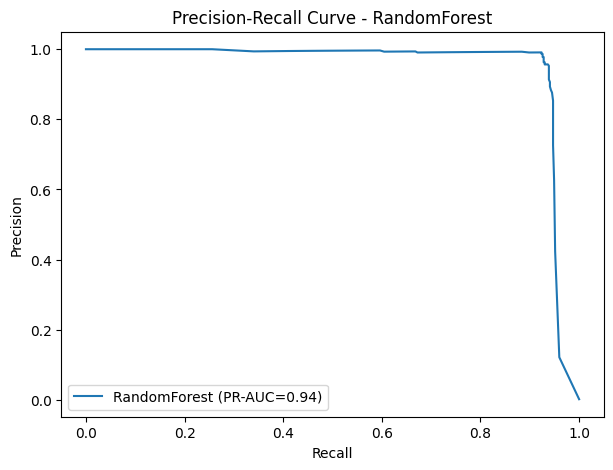

Figura guardada en src/visualization/pr_curve_RandomForest.png


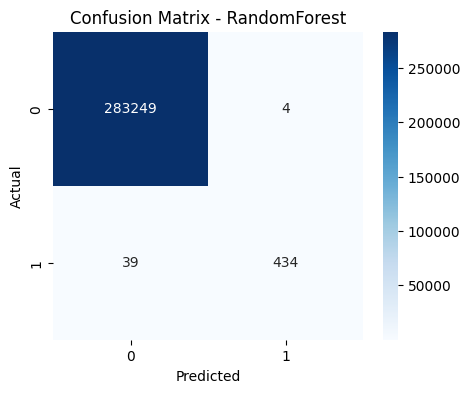

Figura guardada en src/visualization/confusion_matrix_RandomForest.png
Métricas guardadas en: src/tables/metrics_RandomForest.csv

XGBoost Metrics:
ROC-AUC: 0.9925
PR-AUC: 0.9487


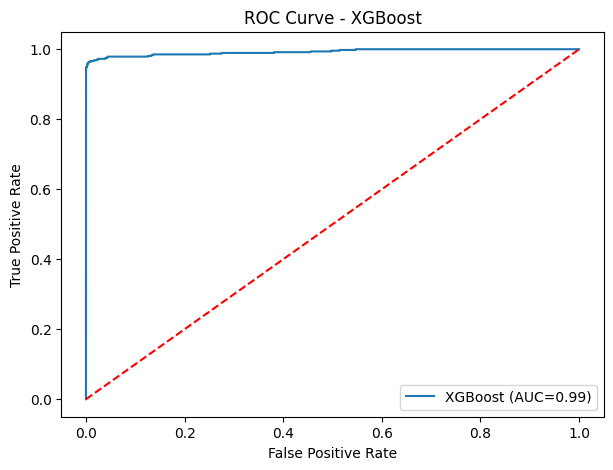

Figura guardada en src/visualization/roc_curve_XGBoost.png


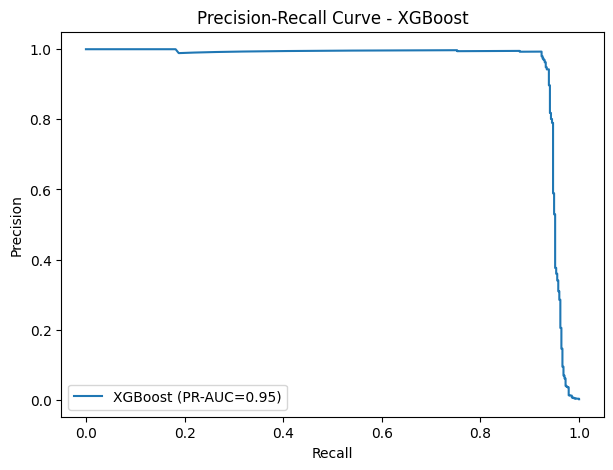

Figura guardada en src/visualization/pr_curve_XGBoost.png


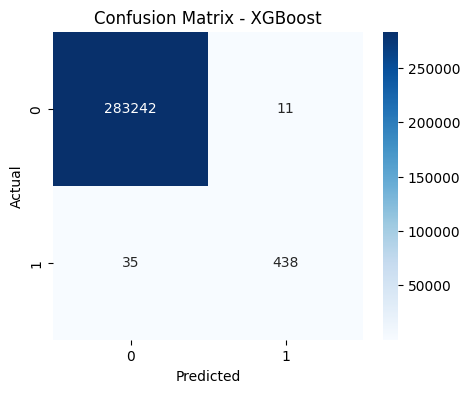

Figura guardada en src/visualization/confusion_matrix_XGBoost.png
Métricas guardadas en: src/tables/metrics_XGBoost.csv


In [5]:
# --------------------
# CARGAR DATA LIMPIA
# --------------------
df = load_data(os.path.join(data_processed, "creditcard_clean.csv"))
X = df.drop("Class", axis=1)
y = df["Class"]

# --------------------
# CARGAR MODELOS
# --------------------
import joblib

rf_model = joblib.load(os.path.join(models_dir, "rf_model.pkl"))
xgb_model = joblib.load(os.path.join(models_dir, "xgb_model.pkl"))

# --------------------
# METRICAS Y FIGURAS
# --------------------
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
import seaborn as sns

figures_dir = "src/visualization"
tables_dir = "src/tables"
os.makedirs(figures_dir, exist_ok=True)
os.makedirs(tables_dir, exist_ok=True)
models = {"RandomForest": rf_model, "XGBoost": xgb_model}

for name, model in models.items():
    y_pred_proba = model.predict_proba(X)[:,1]
    y_pred = model.predict(X)

    # ROC-AUC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    pr_auc = average_precision_score(y, y_pred_proba)

    print(f"\n{name} Metrics:")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")

    # --------------------
    # ROC Curve
    # --------------------
    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')
    ax.plot([0,1], [0,1], 'r--')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve - {name}")
    ax.legend()
    plt.show()
    save_plot(fig, f"roc_curve_{name}.png", figures_dir)

    # --------------------
    # Precision-Recall Curve
    # --------------------
    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(recall, precision, label=f'{name} (PR-AUC={pr_auc:.2f})')
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title(f"Precision-Recall Curve - {name}")
    ax.legend()
    plt.show()
    save_plot(fig, f"pr_curve_{name}.png", figures_dir)

    # --------------------
    # Confusion Matrix
    # --------------------
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()
    save_plot(fig, f"confusion_matrix_{name}.png", figures_dir)

    # --------------------
    # Guardar métricas en tabla
    # --------------------
    metrics_df = pd.DataFrame({
        'Model': [name],
        'ROC-AUC': [roc_auc],
        'PR-AUC': [pr_auc],
        'Accuracy': [(y_pred==y).mean()],
        'Positive Rate Predicted': [y_pred.sum()/len(y)]
    })
    metrics_file = os.path.join(tables_dir, f"metrics_{name}.csv")
    metrics_df.to_csv(metrics_file, index=False)
    print(f"Métricas guardadas en: {metrics_file}")
